<a href="https://colab.research.google.com/github/prp20/tensorflow_learning/blob/main/practice_notebooks/Rock_paper_scissors_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install tensorflow==2.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 25.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully unin

In [3]:
import tensorflow as tf

tf.__version__

'2.9.0'

In [4]:
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d drgfreeman/rockpaperscissors

 99% 303M/306M [00:16<00:00, 19.3MB/s]
100% 306M/306M [00:16<00:00, 19.3MB/s]


In [6]:
! unzip rockpaperscissors.zip -d rps_dataset

Archive:  rockpaperscissors.zip
  inflating: rps_dataset/README_rpc-cv-images.txt  
  inflating: rps_dataset/paper/04l5I8TqdzF9WDMJ.png  
  inflating: rps_dataset/paper/0Og76sl5CJhbxWWx.png  
  inflating: rps_dataset/paper/0RA9rcrv8iVvuDDU.png  
  inflating: rps_dataset/paper/0Uomd0HvOB33m47I.png  
  inflating: rps_dataset/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: rps_dataset/paper/0cb6cVL8pkfi4wF6.png  
  inflating: rps_dataset/paper/0eqArS2GgsBeqgSn.png  
  inflating: rps_dataset/paper/0t08v9bAaA0mXGCQ.png  
  inflating: rps_dataset/paper/0vugygEjxQJPr9yz.png  
  inflating: rps_dataset/paper/0zKU6wEhT2cDe9j0.png  
  inflating: rps_dataset/paper/14K62H4KG1hg5qiJ.png  
  inflating: rps_dataset/paper/1Dfw5FRlS4h60JPX.png  
  inflating: rps_dataset/paper/1Frbe8cdOdkciOBg.png  
  inflating: rps_dataset/paper/1Tt9U9SzrOm98Xtw.png  
  inflating: rps_dataset/paper/1fKclJk4eBWOQSR1.png  
  inflating: rps_dataset/paper/1jHtb93pI8f6pfKo.png  
  inflating: rps_dataset/paper/1oKnUgV2CdCaQUUX.png 

In [7]:
! rm -rf /content/rps_dataset/rps-cv-images

In [8]:
import pandas as pd
import os
import shutil
from sklearn.model_selection import train_test_split

In [9]:
BASE_DIR = "/content/rps_dataset"

In [10]:
import os
import shutil
import pandas as pd
import random
import numpy as np

import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201

import cv2

import warnings
warnings.filterwarnings('ignore')

In [11]:
def blur_preprocessing(img):
    return cv2.blur(img, (5, 5))

tf.random.set_seed(99)

## Initalize Image Data Generator with Augmentation
train_img_data_generator = ImageDataGenerator(rescale=1/255,
                                              validation_split=0.2,
                                              rotation_range = 180,
                                              horizontal_flip = True,
                                              vertical_flip = True,
                                              preprocessing_function=blur_preprocessing)

val_image_data_generator = ImageDataGenerator(rescale = 1/255, 
                                              validation_split=0.2,
                                              rotation_range = 180,
                                              horizontal_flip = True,
                                              vertical_flip = True,
                                              preprocessing_function=blur_preprocessing)

## Recreate datasets from dataframe
train_data_multi = train_img_data_generator.flow_from_directory(BASE_DIR,
                                                    target_size=(300, 200),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    subset='training',
                                                    shuffle=True,
                                                    seed=42)

val_data_multi = val_image_data_generator.flow_from_directory(BASE_DIR,
                                                    target_size=(300, 200),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    subset='validation',
                                                    shuffle=True,
                                                    seed=42)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [12]:
# learning rate decay
learning_rate_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0003, 
                                                                         decay_steps=2, 
                                                                         decay_rate=0.97, 
                                                                         staircase=False)

In [13]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    
    def on_train_begin(self, logs=None):
        self.patience = 3
        self.best = 0
        self.wait = 0
    
    def on_epoch_end(self, epoch, logs=None):
        if np.greater(logs["val_accuracy"], self.best):
            self.wait = 0
            self.best = logs["val_accuracy"]
        else:
            self.wait +=1
            if self.wait >= self.patience:
                print(f"Stopping Training. Validation accuracy hasn't improved >= {self.patience} times")
                self.model.stop_training=True

In [14]:
def get_callbacks(model_name):
  callbacks = []
  MC = tf.keras.callbacks.ModelCheckpoint(f"saved_models/rps_dataset/{model_name}.h5",monitor='val_loss', save_best_only='True', verbose=1)
  ES = EarlyStoppingCallback()
  return [MC, ES]

In [15]:
model_configs = dict()

def cfg_model_run(model, history):
    return {"model": model, "history" : history}

In [25]:
def run_model(model_name, model_func, model_configs, epochs, classes):

    model = model_func(classes, trainable_weights = False)

    model_hist = model.fit(train_data_multi, validation_data=val_data_multi, epochs=epochs, callbacks= get_callbacks(model.name))
    model.save(f"saved_models/{model_name}")
    model_configs[model_name] = cfg_model_run(model, model_hist)
    return

In [24]:
def create_base_model(classes, trainable_weights = False, weights_path=None):
  model = tf.keras.Sequential(name="basic_model")

  model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(300, 200, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.24))
  model.add(tf.keras.layers.Dense(classes,activation='softmax'))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler)
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
  return model

In [18]:
def create_densenet_model(classes, trainable_weights=False, weights_path=None):
    tf.keras.backend.clear_session()
    dense_net = DenseNet201(input_shape=(300, 200, 3), weights="imagenet", include_top=False)
    for layer in dense_net.layers:
        layer.trainable=trainable_weights
    model = tf.keras.models.Sequential([dense_net,
                                        tf.keras.layers.GlobalAveragePooling2D(),
                                        tf.keras.layers.Dense(128, activation='relu'),
                                        tf.keras.layers.Dropout(0.3),
                                        tf.keras.layers.Dense(classes, activation='softmax')
                                ], name="densenet201")
    if weights_path:
        model.load_weights(weights_path)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16

def create_vgg16_model(classes, trainable_weights=False, weights_path=None):
    tf.keras.backend.clear_session()
    vgg16 = VGG16(input_shape = (300, 200, 3), include_top = False, weights = 'imagenet')
    for layer in vgg16.layers:
      layer.trainable=trainable_weights
    
    model = tf.keras.models.Sequential(name="vgg16")
    # initialize EfficientNetB3 model with input shape as (300,300,3)
    model.add(vgg16)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(256, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(classes, activation = 'softmax'))
    if weights_path:
        model.load_weights(weights_path)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

In [20]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

def create_inception_model(classes, trainable_weights=False, weights_path=None):
    tf.keras.backend.clear_session()
    inception = InceptionV3(input_shape = (300, 200, 3), include_top = False, weights = 'imagenet')
    for layer in inception.layers:
      layer.trainable=trainable_weights
    
    model = tf.keras.models.Sequential(name="inception")
    # initialize EfficientNetB3 model with input shape as (300,300,3)
    model.add(inception)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(256, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(classes, activation = 'softmax'))
    if weights_path:
        model.load_weights(weights_path)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

In [21]:
from tensorflow.keras.applications import ResNet50

def create_resnet_model(classes, trainable_weights=False, weights_path=None):
    tf.keras.backend.clear_session()
    resnet = ResNet50(input_shape = (300, 200, 3), include_top = False, weights = 'imagenet')
    for layer in resnet.layers:
      layer.trainable=trainable_weights
    
    model = tf.keras.models.Sequential(name="resnet")
    model.add(resnet)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(256, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(classes, activation = 'softmax'))
    if weights_path:
        model.load_weights(weights_path)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

In [22]:
from tensorflow.keras.applications import EfficientNetB3, EfficientNetB5

def create_efficientnet_model(classes, trainable_weights=False, weights_path=None):
    tf.keras.backend.clear_session()
    efficientnet = EfficientNetB5(input_shape = (300, 200, 3), include_top = False, weights = 'imagenet')
    for layer in efficientnet.layers:
      layer.trainable=trainable_weights
    
    model = tf.keras.models.Sequential(name="efficientnet")
    
    model.add(efficientnet)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(256, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(classes, activation = 'softmax'))
    if weights_path:
        model.load_weights(weights_path)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

In [27]:
model_configs=dict()
run_model("Base_model", create_base_model, model_configs, epochs=25, classes = 3)
run_model("EfficientNet", create_efficientnet_model, model_configs, epochs=25, classes = 3)
run_model("Densenet", create_densenet_model, model_configs, epochs=25, classes = 3)
run_model("VGG16", create_vgg16_model, model_configs, epochs=25, classes = 3)
run_model("Inception", create_inception_model, model_configs, epochs=25, classes = 3)
run_model("ResNet50", create_resnet_model, model_configs, epochs=25, classes = 3)

Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 1.1034 - accuracy: 0.3484
Epoch 1: val_loss improved from inf to 1.09532, saving model to saved_models/rps_dataset/basic_model.h5
55/55 [==============================] - 35s 632ms/step - loss: 1.1034 - accuracy: 0.3484 - val_loss: 1.0953 - val_accuracy: 0.3432
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 1.0868 - accuracy: 0.3741
Epoch 2: val_loss improved from 1.09532 to 1.08880, saving model to saved_models/rps_dataset/basic_model.h5
55/55 [==============================] - 36s 649ms/step - loss: 1.0868 - accuracy: 0.3741 - val_loss: 1.0888 - val_accuracy: 0.4188
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 1.0844 - accuracy: 0.3809
Epoch 3: val_loss improved from 1.08880 to 1.07861, saving model to saved_models/rps_dataset/basic_model.h5
55/55 [==============================] - 35s 627ms/step - loss: 1.0844 - accuracy: 0.3809 - val_loss: 1.0786 - val_accuracy: 0.3867
Ep

Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 1.1243 - accuracy: 0.3335
Epoch 1: val_loss improved from inf to 1.10171, saving model to saved_models/rps_dataset/efficientnet.h5
55/55 [==============================] - 59s 815ms/step - loss: 1.1243 - accuracy: 0.3335 - val_loss: 1.1017 - val_accuracy: 0.3318
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 1.1136 - accuracy: 0.3341
Epoch 2: val_loss improved from 1.10171 to 1.09854, saving model to saved_models/rps_dataset/efficientnet.h5
55/55 [==============================] - 41s 751ms/step - loss: 1.1136 - accuracy: 0.3341 - val_loss: 1.0985 - val_accuracy: 0.3432
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 1.1083 - accuracy: 0.3330
Epoch 3: val_loss improved from 1.09854 to 1.09845, saving model to saved_models/rps_dataset/efficientnet.h5
55/55 [==============================] - 42s 755ms/step - loss: 1.1083 - accuracy: 0.3330 - val_loss: 1.0984 - val_accuracy: 0.3432

74836368/74836368 [==============================] - 5s 0us/step
Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 0.8872 - accuracy: 0.5797
Epoch 1: val_loss improved from inf to 0.66646, saving model to saved_models/rps_dataset/densenet201.h5
55/55 [==============================] - 64s 910ms/step - loss: 0.8872 - accuracy: 0.5797 - val_loss: 0.6665 - val_accuracy: 0.7712
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 0.6207 - accuracy: 0.7504
Epoch 2: val_loss improved from 0.66646 to 0.56348, saving model to saved_models/rps_dataset/densenet201.h5
55/55 [==============================] - 40s 721ms/step - loss: 0.6207 - accuracy: 0.7504 - val_loss: 0.5635 - val_accuracy: 0.7941
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 0.5668 - accuracy: 0.7841
Epoch 3: val_loss improved from 0.56348 to 0.54902, saving model to saved_models/rps_dataset/densenet201.h5
55/55 [==============================] - 39s 718ms/step - loss: 0.566

58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 1.1829 - accuracy: 0.3746
Epoch 1: val_loss improved from inf to 1.03938, saving model to saved_models/rps_dataset/vgg16.h5
55/55 [==============================] - 47s 798ms/step - loss: 1.1829 - accuracy: 0.3746 - val_loss: 1.0394 - val_accuracy: 0.5744
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 1.1091 - accuracy: 0.3963
Epoch 2: val_loss improved from 1.03938 to 1.01978, saving model to saved_models/rps_dataset/vgg16.h5
55/55 [==============================] - 39s 701ms/step - loss: 1.1091 - accuracy: 0.3963 - val_loss: 1.0198 - val_accuracy: 0.6339
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 1.0983 - accuracy: 0.3981
Epoch 3: val_loss improved from 1.01978 to 1.01765, saving model to saved_models/rps_dataset/vgg16.h5
55/55 [==============================] - 39s 702ms/step - loss: 1.0983 - accuracy: 0.39

87910968/87910968 [==============================] - 6s 0us/step
Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 0.9420 - accuracy: 0.5745
Epoch 1: val_loss improved from inf to 0.66544, saving model to saved_models/rps_dataset/inception.h5
55/55 [==============================] - 46s 745ms/step - loss: 0.9420 - accuracy: 0.5745 - val_loss: 0.6654 - val_accuracy: 0.7391
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 0.6896 - accuracy: 0.7053
Epoch 2: val_loss improved from 0.66544 to 0.57558, saving model to saved_models/rps_dataset/inception.h5
55/55 [==============================] - 36s 660ms/step - loss: 0.6896 - accuracy: 0.7053 - val_loss: 0.5756 - val_accuracy: 0.7666
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 0.6355 - accuracy: 0.7293
Epoch 3: val_loss did not improve from 0.57558
55/55 [==============================] - 35s 635ms/step - loss: 0.6355 - accuracy: 0.7293 - val_loss: 0.6082 - val_accuracy: 0.7529
Ep

94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 1.2275 - accuracy: 0.3335
Epoch 1: val_loss improved from inf to 1.10101, saving model to saved_models/rps_dataset/resnet.h5
55/55 [==============================] - 44s 738ms/step - loss: 1.2275 - accuracy: 0.3335 - val_loss: 1.1010 - val_accuracy: 0.3432
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 1.1411 - accuracy: 0.3335
Epoch 2: val_loss did not improve from 1.10101
55/55 [==============================] - 37s 677ms/step - loss: 1.1411 - accuracy: 0.3335 - val_loss: 1.1039 - val_accuracy: 0.3318
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 1.1177 - accuracy: 0.3438
Epoch 3: val_loss improved from 1.10101 to 1.09887, saving model to saved_models/rps_dataset/resnet.h5
55/55 [==============================] - 36s 660ms/step - loss: 1.1177 - accuracy: 0.3438 - val_loss: 1.0989 - val_accuracy: 0.3272
Epoch 4/

In [28]:
import math
number_of_examples = len(val_data_multi.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(val_data_multi[i][1]))

In [40]:
y_true = tf.argmax(test_labels, axis=1)

In [41]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [42]:
models_results = {}
for key, val in model_configs.items():
  preds = val['model'].predict(val_data_multi)
  y_pred = tf.argmax(preds, axis=1)
  models_results[key] = calculate_results(y_true, y_pred)

14/14 [==============================] - 7s 487ms/step


In [43]:
models_results

{'Base_model': {'accuracy': 29.061784897025174,
  'precision': 0.28765221833394194,
  'recall': 0.2906178489702517,
  'f1': 0.2834639919679711},
 'EfficientNet': {'accuracy': 34.32494279176201,
  'precision': 0.1178201697657735,
  'recall': 0.34324942791762014,
  'f1': 0.17542560200219084},
 'Densenet': {'accuracy': 34.78260869565217,
  'precision': 0.346455015033861,
  'recall': 0.34782608695652173,
  'f1': 0.34662514042588904},
 'VGG16': {'accuracy': 32.951945080091534,
  'precision': 0.3201974294559745,
  'recall': 0.3295194508009153,
  'f1': 0.31415273022898793},
 'Inception': {'accuracy': 33.40961098398169,
  'precision': 0.3329122734557956,
  'recall': 0.3340961098398169,
  'f1': 0.33289492449254515},
 'ResNet50': {'accuracy': 31.35011441647597,
  'precision': 0.18239332346210796,
  'recall': 0.3135011441647597,
  'f1': 0.19226272086074087}}

In [45]:
new_model=tf.keras.models.load_model("/content/saved_models/rps_dataset/densenet201.h5")
res = new_model.predict(val_data_multi)
res = tf.argmax(res, axis=1)
calculate_results(y_true, res)

14/14 [==============================] - 12s 609ms/step


{'accuracy': 31.80778032036613,
 'precision': 0.3180676512759236,
 'recall': 0.3180778032036613,
 'f1': 0.31789112494019844}

In [49]:
for file in os.listdir("/content/saved_models/rps_dataset/"):
  new_model=tf.keras.models.load_model(f"/content/saved_models/rps_dataset/{file}")
  res = new_model.predict(val_data_multi)
  res = tf.argmax(res, axis=1)
  print(calculate_results(y_true, res))

14/14 [==============================] - 7s 499ms/step
{'accuracy': 34.09610983981693, 'precision': 0.34139814025607484, 'recall': 0.34096109839816935, 'f1': 0.336244495565502}
14/14 [==============================] - 7s 495ms/step
{'accuracy': 34.55377574370709, 'precision': 0.35583408561526947, 'recall': 0.34553775743707094, 'f1': 0.3320614825160338}
14/14 [==============================] - 8s 551ms/step
{'accuracy': 32.951945080091534, 'precision': 0.3260446520143511, 'recall': 0.3295194508009153, 'f1': 0.3039220128452882}
14/14 [==============================] - 9s 536ms/step
{'accuracy': 31.80778032036613, 'precision': 0.3171989110340355, 'recall': 0.3180778032036613, 'f1': 0.3175233381423274}
14/14 [==============================] - 12s 535ms/step
{'accuracy': 30.892448512585812, 'precision': 0.30932264992270725, 'recall': 0.30892448512585813, 'f1': 0.3086152425577938}
14/14 [==============================] - 9s 589ms/step
{'accuracy': 33.86727688787185, 'precision': 0.2385939055

In [52]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, filename, classes=None, figsize=(10, 10), text_size=15, norm=False,  savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig(filename)

14/14 [==============================] - 7s 506ms/step
{'accuracy': 31.57894736842105, 'precision': 0.3186062045074481, 'recall': 0.3157894736842105, 'f1': 0.3146245183353175}
14/14 [==============================] - 7s 496ms/step
{'accuracy': 33.63844393592677, 'precision': 0.32266994264889165, 'recall': 0.33638443935926776, 'f1': 0.31634644060080885}
14/14 [==============================] - 8s 561ms/step
{'accuracy': 32.951945080091534, 'precision': 0.34490866536546716, 'recall': 0.3295194508009153, 'f1': 0.30648591442059114}
14/14 [==============================] - 9s 563ms/step
{'accuracy': 33.86727688787185, 'precision': 0.33859595781792573, 'recall': 0.33867276887871856, 'f1': 0.33860285125801176}
14/14 [==============================] - 12s 541ms/step
{'accuracy': 31.80778032036613, 'precision': 0.3189537890854404, 'recall': 0.3180778032036613, 'f1': 0.3178481730235646}
14/14 [==============================] - 9s 593ms/step
{'accuracy': 30.663615560640732, 'precision': 0.1941318

OSError: ignored

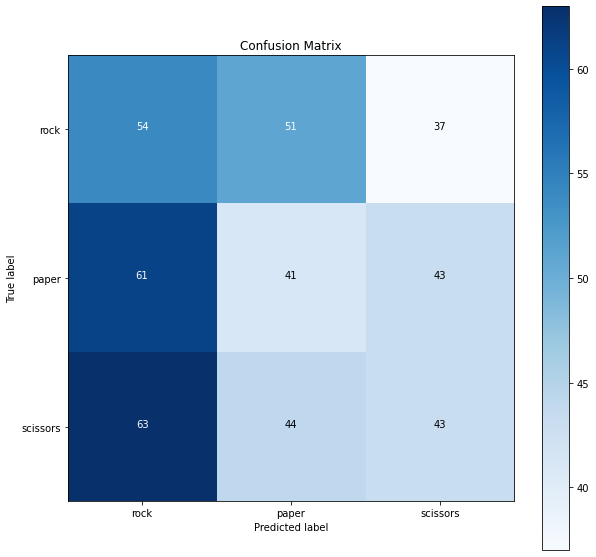

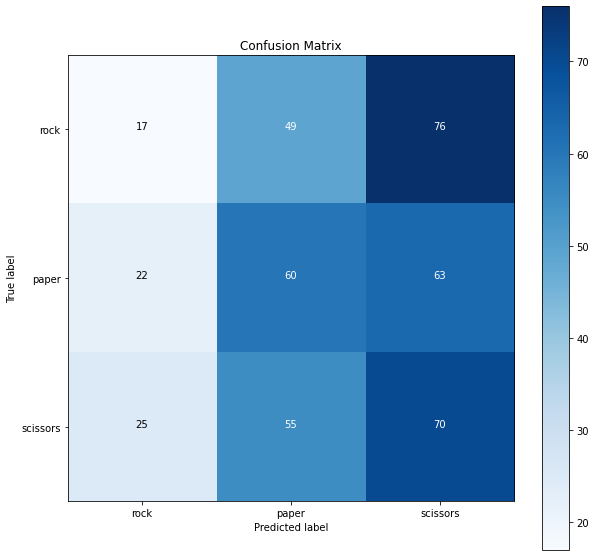

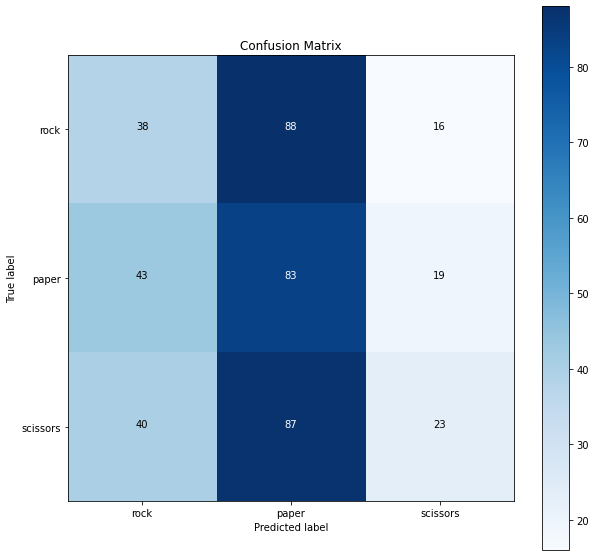

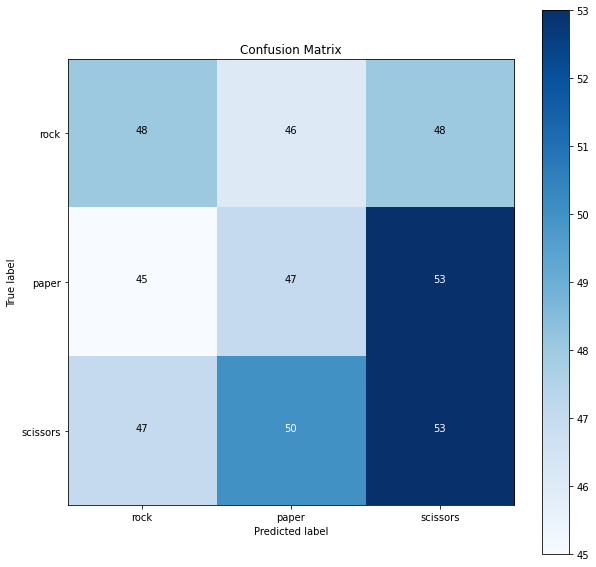

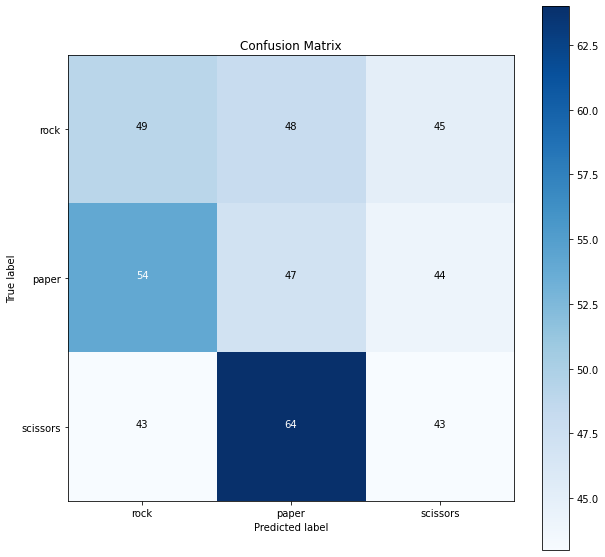

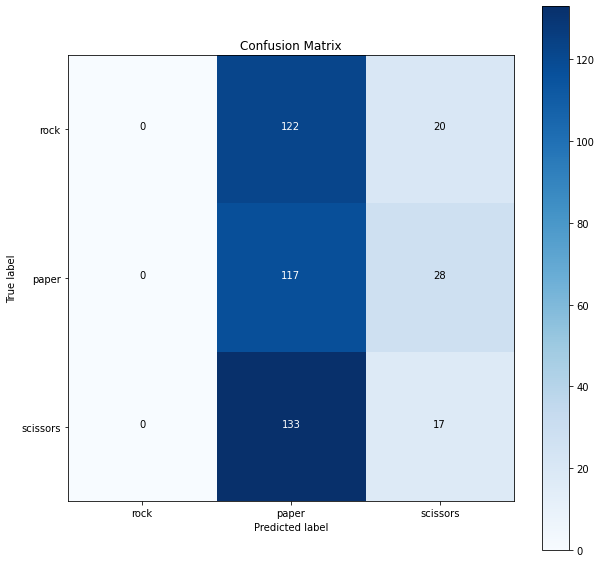

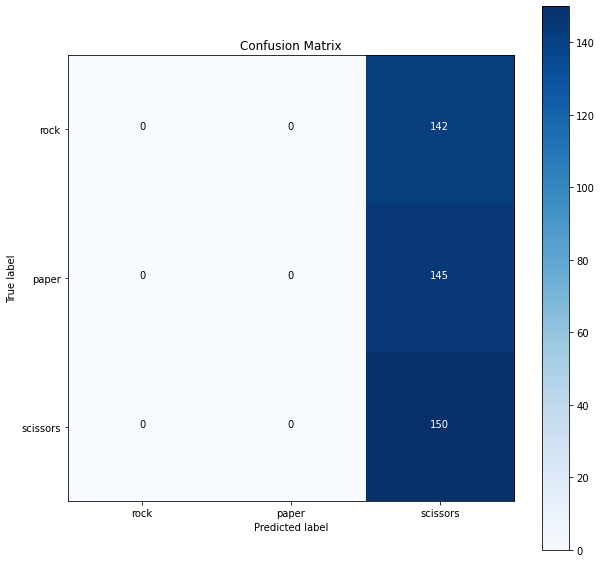

In [58]:
classes = ['rock', 'paper', 'scissors']
count = 0
for file in os.listdir("/content/saved_models/rps_dataset/"):
  new_model=tf.keras.models.load_model(f"/content/saved_models/rps_dataset/{file}")
  res = new_model.predict(val_data_multi)
  res = tf.argmax(res, axis=1)
  print(calculate_results(y_true, res))
  count = count + 1
  make_confusion_matrix(y_true, res, f"/content/saved_models/{count}.png", classes, figsize=(10, 10), text_size=10, savefig = True)